环境配置见environment.txt

如果第一个cell运行之后，报了ModuleNotFoundError，检查右上角的ipykernel是否和左下角环境配置中的环境一致。e.g.左下角环境是ja_nlp_python37，则右上角的的ipykernel需要是该环境下的ipykernel

In [1]:
import sys
sys.path.insert(0, 'c:\\Users\\zhouy217\\OneDrive - Pfizer\\Documents\\data_pipeline\\app')
 
import utils as U
import text_mining_preprocess_0712

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\zhouy217\AppData\Local\Temp\1\jieba.cache
Loading model cost 1.823 seconds.
Prefix dict has been built successfully.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zhouy217\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zhouy217\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# from text_mining_preprocess_0705 import read_file_as_dataframe
ch_df=text_mining_preprocess_0712.read_file_as_dataframe("c:\\Users\\zhouy217\\OneDrive - Pfizer\\Documents\\data_pipeline\\data\\ch_test.xlsx",col_list=[0],name_list=['sentence'],file_header=None)
ch_df.head(3)

,sentence
0,"1,2,3...how ara you *_*乳腺癌是乳腺上皮细胞在多种致癌因子的作用下，发..."
1,啊啊啊疾病早期常表现为乳房肿块、乳头溢液、腋窝淋巴结肿大等症状，晚期可因癌细胞发生远处转移，...
2,宫颈癌和乳腺癌并称女性两大“隐性杀手”。


In [3]:
# from text_mining_preprocess_0705 import TextMiningPreprocess
language_outcome=text_mining_preprocess_0712.TextMiningPreprocess(ch_df).language_detection()
language_outcome

'zh-cn'

In [4]:
ch_text_mining=text_mining_preprocess_0712.TextMiningPreprocess(ch_df)
ch_SentenceList=ch_text_mining.create_SentenceList()
ch_WordList_in_SentenceList=ch_text_mining.chinese_text_cleaning(onlyChinese='yes')
ch_word_list = ch_text_mining.flatten_list()
ch_concat_sentence_text = ch_text_mining.concat_sentence()

In [5]:
ch_SentenceList[4:6]

['结核病是由结核分枝杆菌引起的慢性传染病，可侵及许多脏器，以肺部结核感染最为常见。',
 '排菌者为其重要的传染源。人体感染结核菌后不一定发病，当抵抗力降低或细胞介导的变态反应增高时，才可能引起临床发病。若能及时诊断，并予合理治疗，大多可获临床痊愈。']

In [9]:
# ch_WordList_in_SentenceList
ch_WordList_in_SentenceList[2:4]

[['宫颈癌', '乳腺癌', '并称', '女性', '两大', '隐性', '杀手'],
 ['乳腺癌',
  '常',
  '称为',
  '粉红',
  '杀手',
  '发病率',
  '位居',
  '女性',
  '恶性肿瘤',
  '首位',
  '男性',
  '乳腺癌',
  '较为',
  '少见',
  '医疗',
  '水平',
  '提高',
  '乳腺癌',
  '已',
  '成为',
  '疗效',
  '最佳',
  '实体肿瘤']]

In [7]:
# ch_word_list #flat(1d) word list
# ch_concat_sentence_text

#### chinese text statistical analysis

In [10]:
from text_mining_statistics import Statictics
ch_statistics=Statictics(ch_df)

In [13]:
ch_one_word_cnt_dict,ch_one_word_cnt_df=ch_statistics.one_word_freq(ch_WordList_in_SentenceList)
# ch_one_word_cnt_dict
# ch_one_word_cnt_df
ch_one_word_cnt_df.head(3)

,word,cnt
0,乳腺癌,5
1,乳腺,1
2,上皮细胞,1


In [14]:
# U.sort_dict_by_value(ch_one_word_cnt_dict)  #按照词频排序（字典里是词语和对应词频）

In [15]:
ch_pos_df=ch_statistics.part_of_speech_dataframe('zh-cn',ch_word_list)
ch_pos_df.head(8)   #x代表unknown

,part of speech,count
0,x,130
1,numeral,32
2,eng,14
3,n,158
4,v,101
5,l,11
6,prep,21
7,uj,29


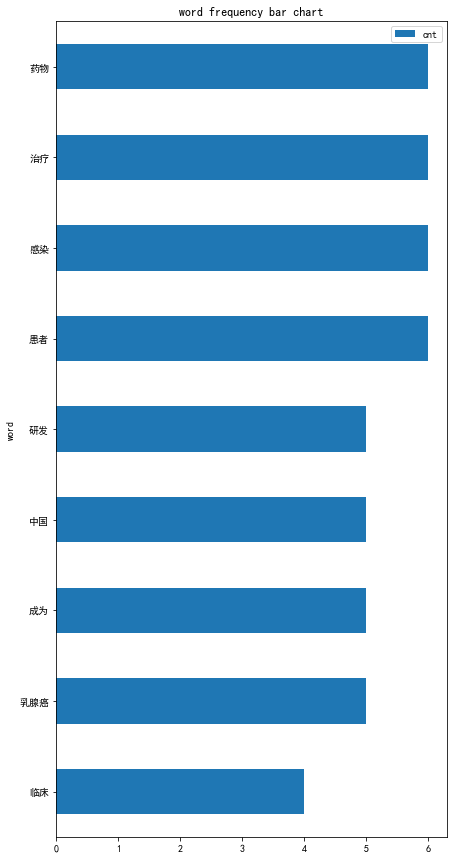

In [16]:
ch_statistics.barh_plot(ch_one_word_cnt_df,col_name='cnt',word_cnt=3)
#word_cnt是选出词频大于word_cnt的词语展示在图中，如果没有这个条件，所有词语在图中放不下且会有warnings
#后面共现词网络中的word_cnt参数同此处

In [17]:
#permutation是无间隔的组合，e.g.“今天 天气 很好” 组合为 “今天天气”“今天很好”“天气很好”
#bigram是两词组合（word pairs), 可以允许有间隔，只要词语组合共现出现，就会被count，用nltk.bigram()函数实现的

In [18]:
ch_unit2_permutation = ch_statistics.unit2_permutation(ch_word_list)

In [19]:
ch_unit2_dictionary = ch_statistics.unit2_dictionary(ch_concat_sentence_text)

In [20]:
ch_two_word_permutation_freq=ch_statistics.two_word_permutation_freq(ch_unit2_dictionary)

In [21]:
# ch_two_word_permutation_freq
ch_two_word_permutation_freq.head(3)

,two_word,two_word_freq
0,辉瑞公司,3
1,治疗类风湿,2
2,也因,2


In [22]:
ch_bigram_df=ch_statistics.create_bigram_df(ch_word_list)
ch_bigram_df.head(5)

,bigram,count
0,"(用于, 治疗)",2
1,"(治疗, 类风湿)",2
2,"(类风湿, 关节炎)",2
3,"(关节炎, 强直性)",2
4,"(强直性, 脊柱炎)",2


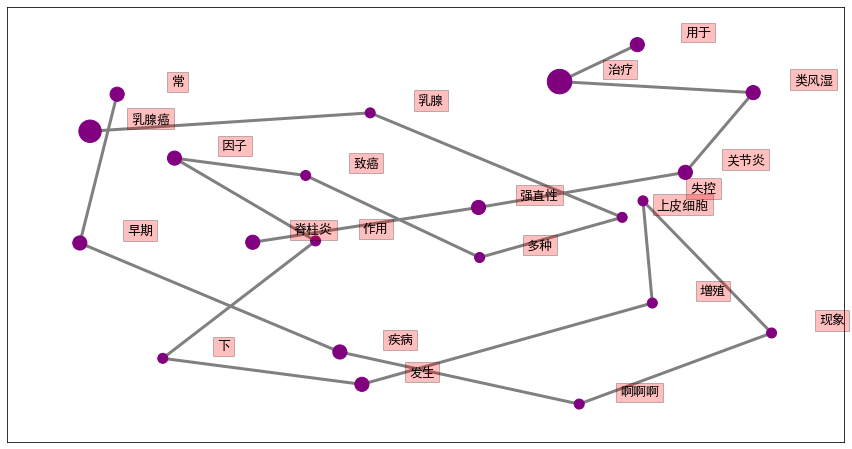

In [23]:
ch_statistics.cooccurrence_network(ch_word_list)

C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  alpha=alpha,


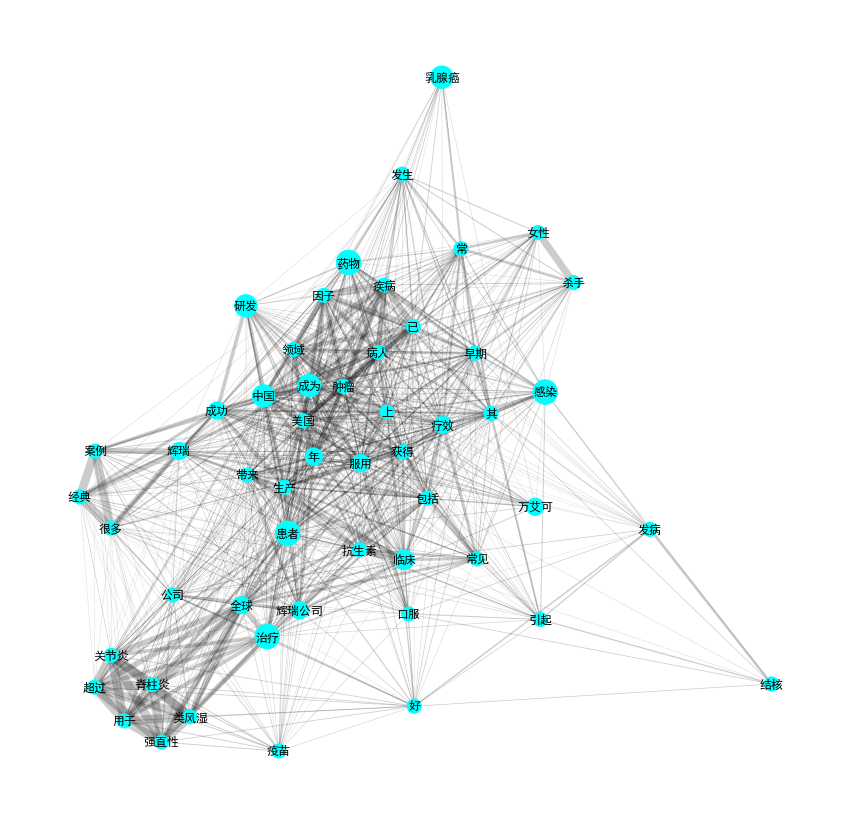

In [29]:
ch_statistics.create_word_network(ch_WordList_in_SentenceList,cnt=1)


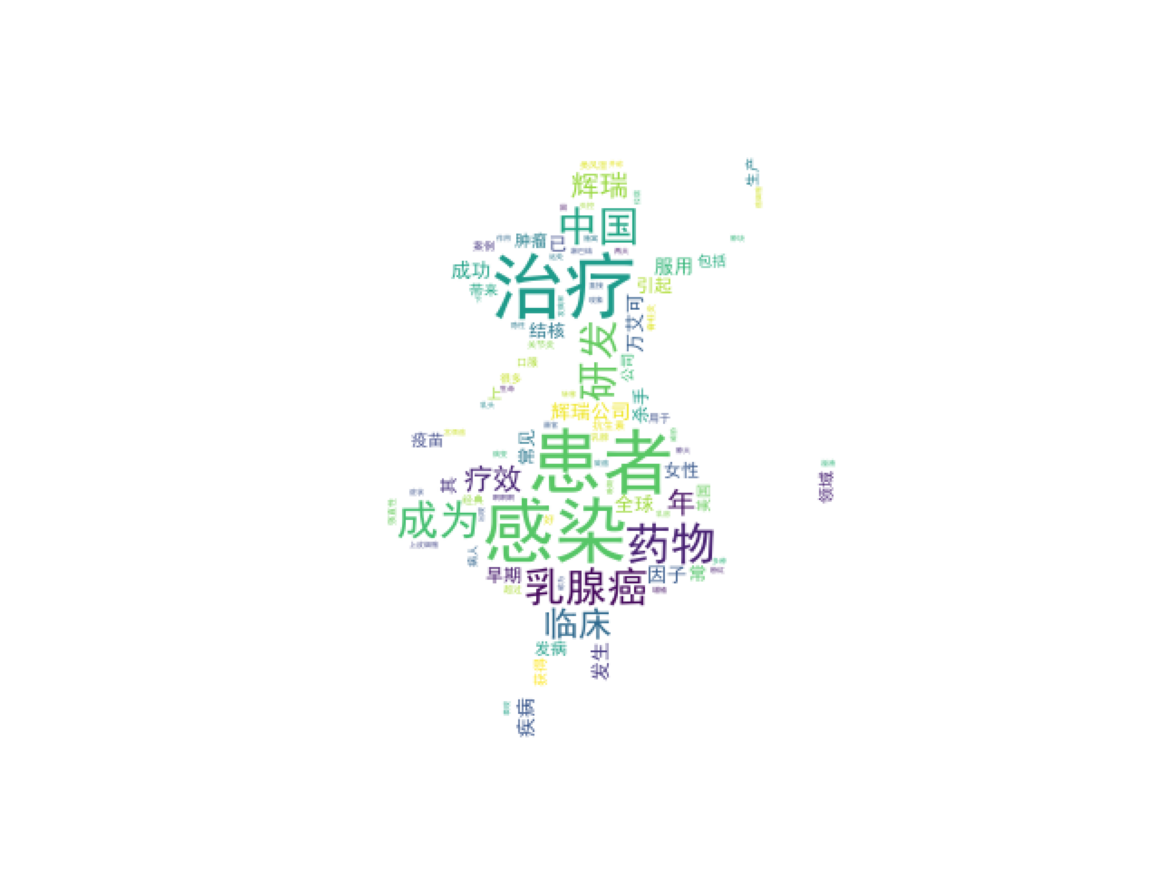

In [25]:
ch_statistics.word_cloud(ch_word_list,ifmask='yes')

In [26]:
from text_mining_model import lda_model

In [27]:
lda_model(ch_word_list,result_save_name='c:\\Users\\zhouy217\\OneDrive - Pfizer\\Documents\\data_pipeline\\notebook\\ch_lda_result.html',num_topics=3,passes=60,num_words=10)

0:
  "服用" (0.017)
  "疗效" ( 0.017)
  "辉瑞公司" ( 0.017)
  "案例" ( 0.012)
  "上" ( 0.012)
  "美国" ( 0.012)
  "生产" ( 0.012)
  "早期" ( 0.012)
  "其" ( 0.012)
  "杀手"( 0.012)
1:
  "治疗" (0.031)
  "中国" ( 0.026)
  "成为" ( 0.026)
  "全球" ( 0.016)
  "年" ( 0.016)
  "领域" ( 0.011)
  "疫苗" ( 0.011)
  "常" ( 0.011)
  "强直性" ( 0.011)
  "好"( 0.011)
2:
  "患者" (0.027)
  "感染" ( 0.027)
  "药物" ( 0.027)
  "研发" ( 0.023)
  "乳腺癌" ( 0.023)
  "临床" ( 0.019)
  "成功" ( 0.014)
  "万艾可" ( 0.014)
  "辉瑞" ( 0.014)
  "抗生素"( 0.010)

Perplexity:  -6.746260335977987
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
